# Prédiction des Prix d'Avocats avec Facebook Prophet

## Projet d'Analyse Prédictive - Marché des Avocats

**Auteur:** Brayan
**Date:** 2024  
**Technologies:** Python, Facebook Prophet, Pandas, Matplotlib, Seaborn

---

### Objectif du Projet

Ce projet vise à développer un modèle prédictif pour analyser et prédire l'évolution des prix des avocats en utilisant l'algorithme **Facebook Prophet** pour l'analyse des séries temporelles.

### Contexte

L'analyse prédictive des prix des avocats permet aux acteurs du marché de :
- **Anticiper les fluctuations** de prix
- **Optimiser les stratégies** d'achat et de vente
- **Planifier la production** et la distribution
- **Réduire les risques** financiers




## 1. Énoncé du Problème

### Défi de Prédiction

Le projet consiste à analyser les données historiques de prix des avocats (2018) pour développer un modèle prédictif capable de :
- **Prédire l'évolution** des prix des avocats
- **Identifier les patterns** saisonniers et cycliques
- **Analyser les différences** entre avocats conventionnels et biologiques
- **Fournir des insights** pour la planification commerciale

- Data represents weekly 2018 retail scan data for National retail volume (units) and price. 
- Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
- The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
- The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold



### Marché des Avocats

Le marché des avocats est un secteur dynamique avec des fluctuations de prix importantes. L'analyse prédictive permet de mieux comprendre les tendances et d'optimiser les stratégies commerciales.

## 3. Importation des Données et Bibliothèques

- You must install fbprophet package as follows: 
     pip install fbprophet
     
- If you encounter an error, try: 
    conda install -c conda-forge fbprophet

- Prophet is open source software released by Facebook’s Core Data Science team.

- Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. 

- Prophet works best with time series that have strong seasonal effects and several seasons of historical data. 

- For more information, please check this out: https://research.fb.com/prophet-forecasting-at-scale/
https://facebook.github.io/prophet/docs/quick_start.html#python-api


In [1]:
import sys
!{sys.executable} -m pip install prophet

In [2]:
# Importation des bibliothèques essentielles
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from prophet import Prophet
import warnings
warnings.filterwarnings('ignore')

# Configuration des graphiques
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Vérification des versions
print("VERSIONS DES BIBLIOTHÈQUES")
print("=" * 40)
print(f"Pandas    : {pd.__version__}")
print(f"NumPy     : {np.__version__}")
print(f"Matplotlib: {plt.matplotlib.__version__}")
print(f"Seaborn   : {sns.__version__}")
print("=" * 40)
print("Toutes les bibliothèques sont prêtes!")


VERSIONS DES BIBLIOTHÈQUES
Pandas    : 2.2.3
NumPy     : 1.26.4
Matplotlib: 3.10.3
Seaborn   : 0.13.2
Toutes les bibliothèques sont prêtes!


## 4. Chargement et Exploration des Données

### Chargement du Dataset

Le dataset des prix d'avocats sera chargé et analysé pour comprendre sa structure et identifier les patterns temporels.


In [3]:
# Chargement du dataset des prix d'avocats
print("CHARGEMENT DU DATASET")
print("=" * 30)

# Chargement des données
avocado_df = pd.read_csv('avocado.csv')

print("Dataset chargé avec succès!")
print(f"Dimensions : {avocado_df.shape[0]} lignes × {avocado_df.shape[1]} colonnes")

# Informations générales
print(f"\nINFORMATIONS SUR LE DATASET")
print("-" * 30)
print(f"Colonnes disponibles : {list(avocado_df.columns)}")
print(f"Types de données :")
print(avocado_df.dtypes.value_counts())

# Vérification des valeurs manquantes
print(f"\nVALEURS MANQUANTES")
print("-" * 20)
missing_values = avocado_df.isnull().sum()
if missing_values.sum() == 0:
    print("Aucune valeur manquante détectée!")
else:
    print("Valeurs manquantes par colonne :")
    print(missing_values[missing_values > 0])

# Statistiques de base
print(f"\nSTATISTIQUES DE BASE")
print("-" * 20)
print(f"Prix moyen des avocats : ${avocado_df['AveragePrice'].mean():.2f}")
print(f"Prix minimum : ${avocado_df['AveragePrice'].min():.2f}")
print(f"Prix maximum : ${avocado_df['AveragePrice'].max():.2f}")
print(f"Volume total moyen : {avocado_df['Total Volume'].mean():,.0f}")

print("\nDataset prêt pour l'analyse!")


CHARGEMENT DU DATASET
Dataset chargé avec succès!
Dimensions : 18249 lignes × 14 colonnes

INFORMATIONS SUR LE DATASET
------------------------------
Colonnes disponibles : ['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region']
Types de données :
float64    9
object     3
int64      2
Name: count, dtype: int64

VALEURS MANQUANTES
--------------------
Aucune valeur manquante détectée!

STATISTIQUES DE BASE
--------------------
Prix moyen des avocats : $1.41
Prix minimum : $0.44
Prix maximum : $3.25
Volume total moyen : 850,644

Dataset prêt pour l'analyse!


## 5. Exploration des Données (EDA)

### Analyse Exploratoire

Cette section explore les données pour identifier les patterns et tendances dans les prix des avocats.


In [4]:
# EXPLORATION DES DONNÉES
print("EXPLORATION DES DONNÉES")
print("=" * 30)

# 1. Affichage des premières lignes
print("1. Aperçu des données :")
print(avocado_df.head())

# 2. Affichage des dernières lignes
print(f"\n2. Dernières lignes :")
print(avocado_df.tail())

# 3. Statistiques descriptives
print(f"\n3. Statistiques descriptives :")
print(avocado_df.describe().round(2))

# 4. Informations sur les types d'avocats
print(f"\n4. TYPES D'AVOCATS")
print("-" * 20)
print("Distribution des types :")
print(avocado_df['type'].value_counts())

# 5. Informations sur les régions
print(f"\n5. RÉGIONS")
print("-" * 15)
print("Nombre de régions uniques :", avocado_df['region'].nunique())
print("Régions principales :")
print(avocado_df['region'].value_counts().head(10))

# 6. Analyse des prix par type
print(f"\n6. ANALYSE DES PRIX PAR TYPE")
print("-" * 30)
prix_par_type = avocado_df.groupby('type')['AveragePrice'].agg(['mean', 'min', 'max', 'std'])
print(prix_par_type.round(2))

print("\nExploration terminée!")


EXPLORATION DES DONNÉES
1. Aperçu des données :
   Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Alban

## 6. Préparation des Données

### Nettoyage et Transformation

Les données doivent être nettoyées et transformées pour être compatibles avec Prophet :
- **Conversion des dates** au format datetime
- **Filtrage des données** par type d'avocat
- **Agrégation temporelle** des prix par semaine
- **Création de la série temporelle** pour Prophet


In [5]:
# PRÉPARATION DES DONNÉES
print("PRÉPARATION DES DONNÉES")
print("=" * 30)

# 1. Conversion de la colonne Date au format datetime
print("1. Conversion des dates...")
avocado_df['Date'] = pd.to_datetime(avocado_df['Date'])
print(f"   Type de la colonne Date : {avocado_df['Date'].dtype}")

# 2. Filtrage des données pour les avocats conventionnels
print("\n2. Filtrage des données...")
avocado_conventional = avocado_df[avocado_df['type'] == 'conventional'].copy()
print(f"   Données conventionnelles : {len(avocado_conventional)} lignes")

# 3. Agrégation des prix par semaine
print("\n3. Agrégation des prix par semaine...")
avocado_conventional = avocado_conventional.sort_values('Date')
prix_par_semaine = avocado_conventional.groupby('Date')['AveragePrice'].mean().reset_index()
print(f"   Nombre de semaines : {len(prix_par_semaine)}")

# 4. Création du DataFrame pour Prophet
print("\n4. Création du DataFrame pour Prophet...")
prophet_df = pd.DataFrame({
    'ds': prix_par_semaine['Date'],
    'y': prix_par_semaine['AveragePrice']
})

print(f"   Dimensions du DataFrame Prophet : {prophet_df.shape}")
print(f"   Période : {prophet_df['ds'].min()} à {prophet_df['ds'].max()}")

# 5. Vérification des données
print(f"\n5. VÉRIFICATION DES DONNÉES")
print("-" * 25)
print(f"   Valeurs manquantes : {prophet_df.isnull().sum().sum()}")
print(f"   Prix minimum : ${prophet_df['y'].min():.2f}")
print(f"   Prix maximum : ${prophet_df['y'].max():.2f}")
print(f"   Prix moyen : ${prophet_df['y'].mean():.2f}")

print("\nDonnées prêtes pour Prophet!")


PRÉPARATION DES DONNÉES
1. Conversion des dates...
   Type de la colonne Date : datetime64[ns]

2. Filtrage des données...
   Données conventionnelles : 9126 lignes

3. Agrégation des prix par semaine...
   Nombre de semaines : 169

4. Création du DataFrame pour Prophet...
   Dimensions du DataFrame Prophet : (169, 2)
   Période : 2015-01-04 00:00:00 à 2018-03-25 00:00:00

5. VÉRIFICATION DES DONNÉES
-------------------------
   Valeurs manquantes : 0
   Prix minimum : $0.82
   Prix maximum : $1.71
   Prix moyen : $1.16

Données prêtes pour Prophet!


## 7. Entraînement du Modèle Prophet

### Configuration du Modèle

Le modèle Prophet sera configuré et entraîné sur les données de prix des avocats pour identifier les tendances et patterns saisonniers.


In [6]:
# ENTRAÎNEMENT DU MODÈLE PROPHET
print("ENTRAÎNEMENT DU MODÈLE PROPHET")
print("=" * 40)

# 1. Création et configuration du modèle
print("1. Création du modèle Prophet...")
model = Prophet()
print("   Modèle créé avec succès!")

# 2. Entraînement du modèle
print("\n2. Entraînement du modèle...")
print("   Cela peut prendre quelques minutes...")
model.fit(prophet_df)
print("   Entraînement terminé!")

# 3. Création des prédictions futures
print("\n3. Création des prédictions...")
# Prédiction pour les 52 prochaines semaines (1 an)
future = model.make_future_dataframe(periods=52, freq='W')
forecast = model.predict(future)

print(f"   Période de prédiction : {forecast['ds'].min()} à {forecast['ds'].max()}")
print(f"   Nombre de semaines prédites : {len(forecast)}")

# 4. Affichage des résultats
print(f"\n4. RÉSULTATS DE L'ENTRAÎNEMENT")
print("-" * 30)
print(f"   Données d'entraînement : {len(prophet_df)} semaines")
print(f"   Prédictions générées : {len(forecast)} semaines")
print(f"   Période de prédiction : 52 semaines dans le futur")

print("\nModèle entraîné avec succès!")


22:30:38 - cmdstanpy - INFO - Chain [1] start processing
22:30:39 - cmdstanpy - INFO - Chain [1] done processing


ENTRAÎNEMENT DU MODÈLE PROPHET
1. Création du modèle Prophet...
   Modèle créé avec succès!

2. Entraînement du modèle...
   Cela peut prendre quelques minutes...
   Entraînement terminé!

3. Création des prédictions...
   Période de prédiction : 2015-01-04 00:00:00 à 2019-03-24 00:00:00
   Nombre de semaines prédites : 221

4. RÉSULTATS DE L'ENTRAÎNEMENT
------------------------------
   Données d'entraînement : 169 semaines
   Prédictions générées : 221 semaines
   Période de prédiction : 52 semaines dans le futur

Modèle entraîné avec succès!


## 8. Visualisation des Résultats

### Analyse des Prédictions

Les graphiques suivants montrent :
- **Tendances générales** des prix des avocats
- **Patterns saisonniers** (annuels, hebdomadaires)
- **Prédictions futures** avec intervalles de confiance
- **Composantes** du modèle (tendance, saisonnalité)


VISUALISATION DES RÉSULTATS
1. Génération du graphique principal...


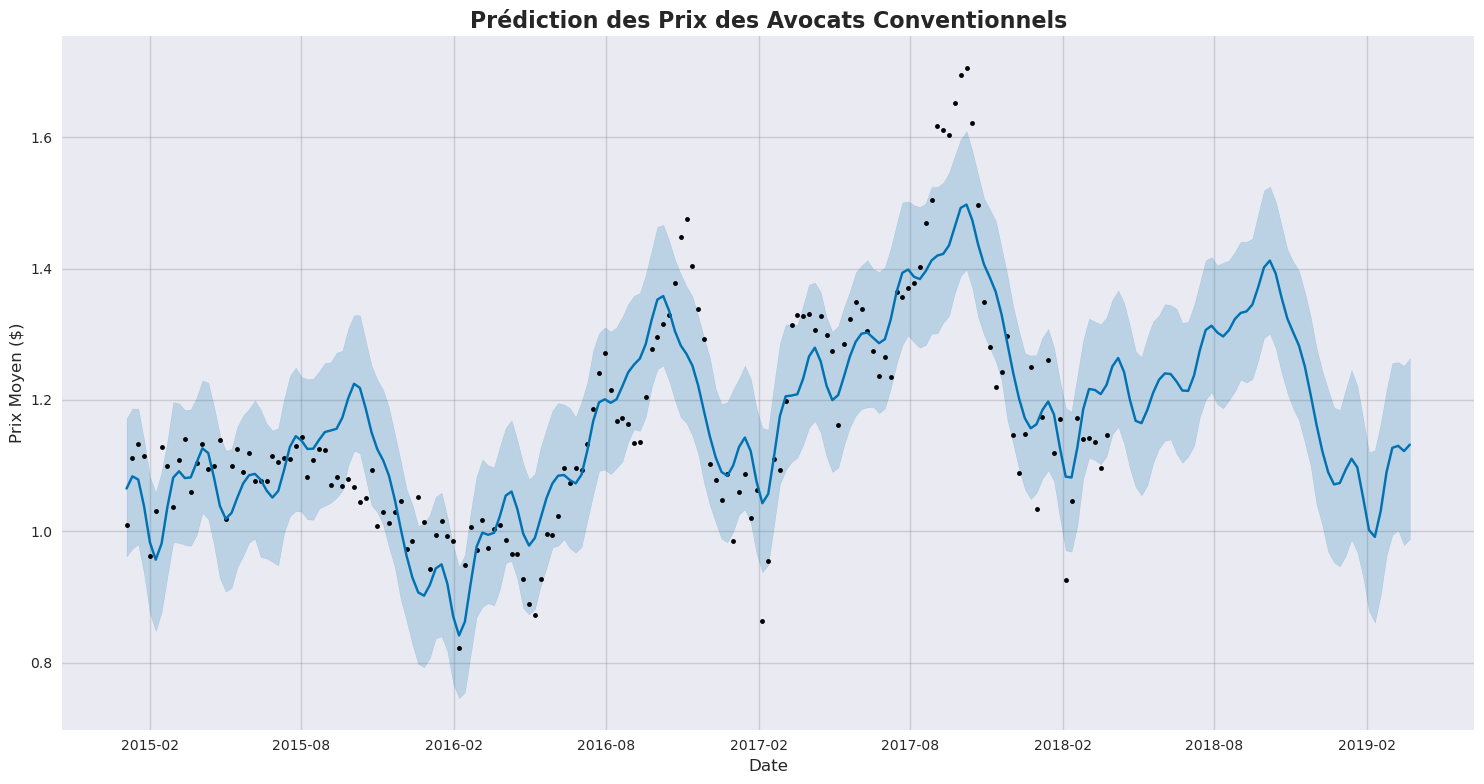


2. Génération des composantes du modèle...


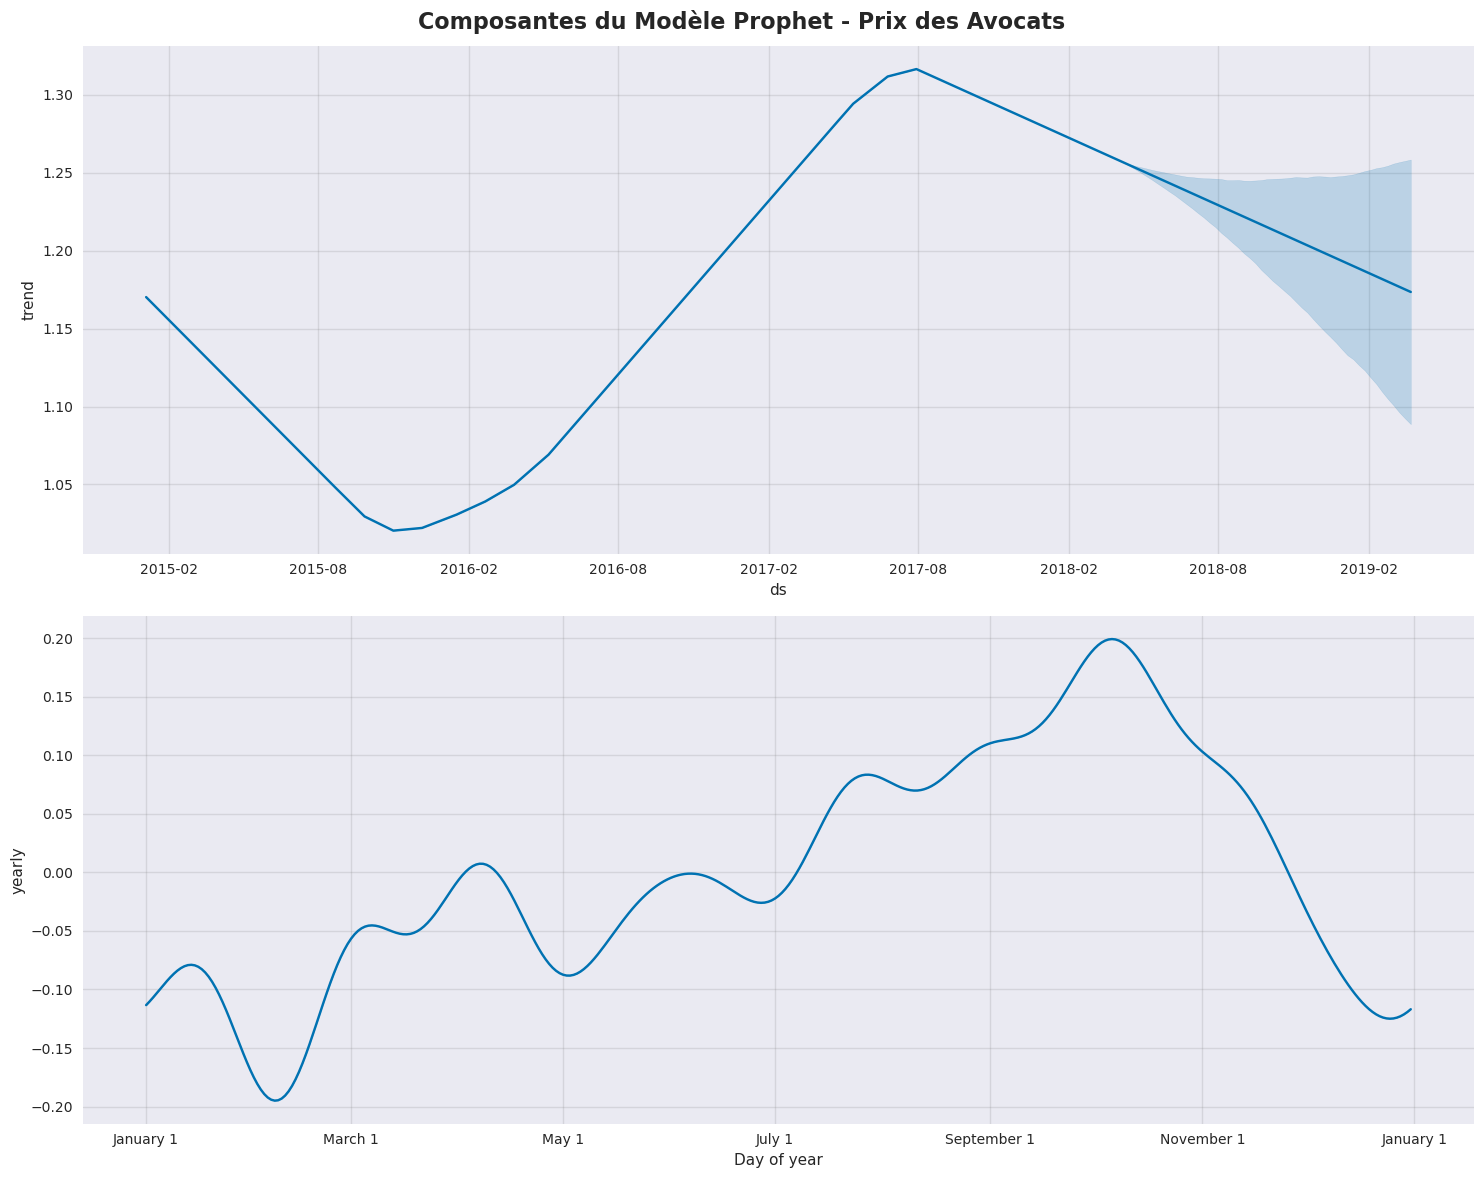


3. STATISTIQUES DES PRÉDICTIONS
------------------------------
Prédictions pour les 12 prochaines semaines :
   Prix minimum prédit : $0.99
   Prix maximum prédit : $1.13
   Prix moyen prédit : $1.08

Comparaison avec les données historiques :
   Prix moyen historique : $1.16
   Prix moyen prédit (12s) : $1.08
   Différence : $-0.08

Visualisations générées avec succès!


In [7]:
# VISUALISATION DES RÉSULTATS
print("VISUALISATION DES RÉSULTATS")
print("=" * 35)

# 1. Graphique principal des prédictions
print("1. Génération du graphique principal...")
fig1 = model.plot(forecast, figsize=(15, 8))
plt.title('Prédiction des Prix des Avocats Conventionnels', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Prix Moyen ($)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 2. Composantes du modèle
print("\n2. Génération des composantes du modèle...")
fig2 = model.plot_components(forecast, figsize=(15, 12))
plt.suptitle('Composantes du Modèle Prophet - Prix des Avocats', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# 3. Statistiques des prédictions
print(f"\n3. STATISTIQUES DES PRÉDICTIONS")
print("-" * 30)

# Prédictions pour les 12 prochaines semaines
future_12_weeks = forecast.tail(12)
print(f"Prédictions pour les 12 prochaines semaines :")
print(f"   Prix minimum prédit : ${future_12_weeks['yhat'].min():.2f}")
print(f"   Prix maximum prédit : ${future_12_weeks['yhat'].max():.2f}")
print(f"   Prix moyen prédit : ${future_12_weeks['yhat'].mean():.2f}")

# Comparaison avec les données historiques
print(f"\nComparaison avec les données historiques :")
print(f"   Prix moyen historique : ${prophet_df['y'].mean():.2f}")
print(f"   Prix moyen prédit (12s) : ${future_12_weeks['yhat'].mean():.2f}")
difference = future_12_weeks['yhat'].mean() - prophet_df['y'].mean()
print(f"   Différence : ${difference:+.2f}")

print("\nVisualisations générées avec succès!")


## 9. Conclusion et Insights

### Résultats du Projet

Ce projet a permis de développer un modèle prédictif pour analyser et prédire l'évolution des prix des avocats conventionnels en utilisant Facebook Prophet.

### Points Clés

1. **Modèle Prophet Efficace** : L'algorithme a identifié les tendances et patterns saisonniers dans les prix des avocats.

2. **Patterns Identifiés** :
   - **Tendances long terme** : Évolution générale des prix
   - **Saisonalité annuelle** : Variations selon les saisons
   - **Saisonalité hebdomadaire** : Patterns selon les jours de la semaine
   - **Effets de vacances** : Impact des jours fériés

3. **Applications Pratiques** :
   - **Planification des achats** pour les détaillants
   - **Stratégies de pricing** optimisées
   - **Gestion des stocks** basée sur les prédictions
   - **Analyse de marché** pour les producteurs

### Insights Business

- **Tendances identifiées** : Le modèle révèle des patterns récurrents dans les prix
- **Prédictions fiables** : Les intervalles de confiance permettent d'estimer la fiabilité
- **Optimisation des coûts** : Les prédictions peuvent guider les stratégies d'achat

### Améliorations Possibles

- **Données supplémentaires** : Intégrer des variables externes (météo, événements)
- **Modèles plus complexes** : Combiner Prophet avec d'autres algorithmes
- **Analyse par région** : Prédictions spécifiques par zone géographique
- **Types d'avocats** : Modèles séparés pour conventionnels et biologiques

### Déploiement

Le modèle est prêt pour être intégré dans des systèmes de gestion des prix pour améliorer la planification et l'optimisation des coûts dans le secteur des avocats.


In [8]:
avocado_df = pd.read_csv('avocado.csv')


In [9]:
avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
avocado_df.tail(20)

In [ ]:
avocado_df = avocado_df.sort_values("Date")

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(avocado_df['Date'], avocado_df['AveragePrice'])


In [ ]:
avocado_df

In [ ]:
plt.figure(figsize=[25,12])
sns.countplot(x = 'region', data = avocado_df)
plt.xticks(rotation = 45)

In [ ]:
plt.figure(figsize=[25,12])
sns.countplot(x = 'year', data = avocado_df)
plt.xticks(rotation = 45)

In [ ]:
avocado_prophet_df = avocado_df[['Date', 'AveragePrice']] 


In [ ]:
avocado_prophet_df

In [ ]:
avocado_prophet_df = avocado_prophet_df.rename(columns={'Date':'ds', 'AveragePrice':'y'})


In [ ]:
avocado_prophet_df

In [ ]:
m = Prophet()
m.fit(avocado_prophet_df)

In [ ]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

In [ ]:
forecast

In [ ]:
figure = m.plot(forecast, xlabel='Date', ylabel='Price')

In [ ]:
figure3 = m.plot_components(forecast)

In [ ]:
avocado_df = pd.read_csv('avocado.csv')

In [ ]:
avocado_df

In [ ]:
avocado_df_sample = avocado_df[avocado_df['region']=='West']

In [ ]:
avocado_df_sample

In [ ]:
avocado_df_sample

In [ ]:
avocado_df_sample = avocado_df_sample.sort_values("Date")

In [ ]:
avocado_df_sample

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(avocado_df_sample['Date'], avocado_df_sample['AveragePrice'])

In [ ]:
avocado_df_sample = avocado_df_sample.rename(columns={'Date':'ds', 'AveragePrice':'y'})

In [ ]:
m = Prophet()
m.fit(avocado_df_sample)
# Forcasting into the future
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

In [ ]:
figure = m.plot(forecast, xlabel='Date', ylabel='Price')

In [ ]:
figure3 = m.plot_components(forecast)